In [7]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
metadata_raw = pd.read_csv('./datasets/SeuratV3/wnn_metadata.csv',sep=' ')

In [73]:
raw_index = metadata_raw.index

In [12]:
metadata_raw.index = [x[:-2]+'.1' for x in metadata_raw.index]

In [8]:
data_adt = pd.read_csv('./datasets/SeuratV3/citeseq_adt_counts.tsv',sep='\t').T

In [14]:
data_adt_f = data_adt[data_adt.index.isin(metadata_raw.index)]

In [15]:
data_clr = np.apply_along_axis(lambda x: np.log(x+1) - np.mean(np.log(x+1)),0,data_adt_f)
data_clr = pd.DataFrame(data_clr,index=data_adt_f.index,columns = data_adt_f.columns)

In [17]:
metadata = metadata_raw[metadata_raw.index.isin(data_adt_f.index)]

In [110]:
data_B = data_adt_f[metadata['celltype.l1']=='B cell']

In [153]:
subdata = data_clr[metadata['wsnn_res.2']==6]

In [124]:
def display_subdata(data,node_data,**para):
    
    savepath = para.get('savepath',None)
    dpi = para.get('dpi',64)
    hist_bw = para.get('hist_bw',0.2)
    fig_name = para.get('fig_name',None)

    if savepath is not None and fig_name is None:
        print('Warning: Para fig_name is required to save figures.')
        return
    
    #print('plot histgrams of all markers in CLR format.')
    plt.figure(figsize=(12,2*np.ceil(node_data.shape[1] / 5)), dpi=dpi)
    plt.style.use('seaborn-white')
    for i in range(node_data.shape[1]):
        ax = plt.subplot(int(np.ceil(node_data.shape[1] / 5)),5,i+1)
        plt.yticks([0,1])
        sns.distplot(data.iloc[:,i].values,kde_kws={'bw':0.2},color='gray')
        sns.distplot(node_data.iloc[:,i].values,kde_kws={'bw':hist_bw},color='red')
        
        plt.title(node_data.columns[i],fontsize=15)
        if i%5 == 0:
            plt.ylabel('Density',fontsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
    
    if fig_name is None:
        plt.suptitle(str(node_data.shape[0])+' droplets',fontsize=18)  
    else:
        plt.suptitle(fig_name+', '+str(node_data.shape[0])+' droplets',fontsize=18)    
        
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.6,wspace=0.15)
    plt.subplots_adjust(top=0.8)
    if savepath is not None:
        plt.savefig(savepath+'/'+fig_name.replace(' ','_')+'.png')
    plt.show()
    #plt.show()
    

/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

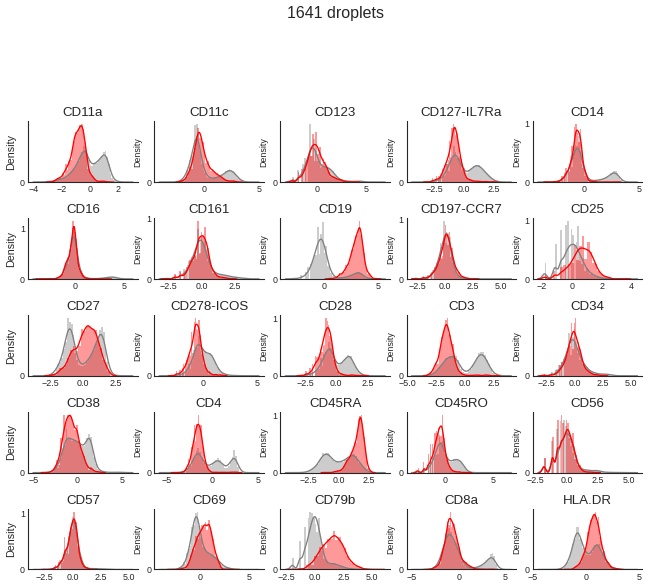

In [138]:
display_subdata(data_clr,data_clr[metadata['wsnn_res.2']==6])


/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

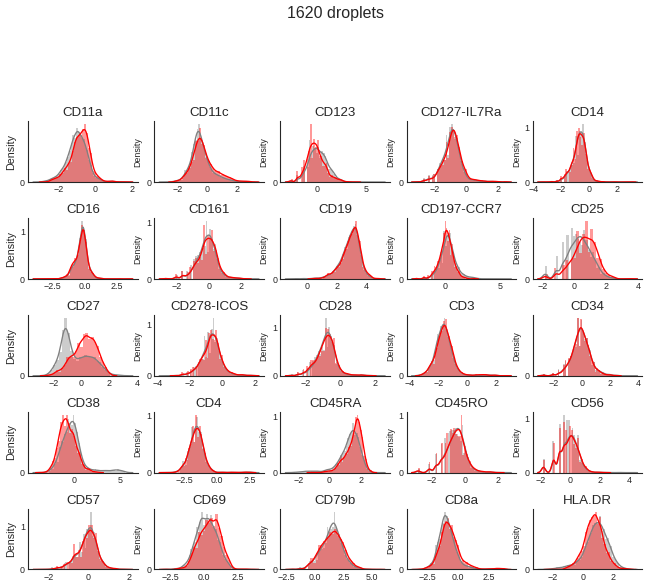

In [132]:
display_subdata(data_clr[metadata['celltype.l1']=='B cell'],data_clr[metadata['celltype.l2']=='Memory B'])

Text(0.5, 1.0, 'ADT weight of CD56 bright NK cells')

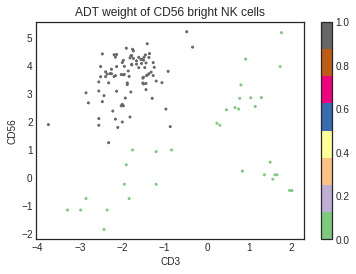

In [251]:
subdata = data_clr[metadata['celltype.l2']=='CD56 bright NK']
# df = pd.concat([subdata[subdata['CD3']>0],subdata[subdata['CD56']<1]])
# plt.scatter(subdata['CD3'],subdata['CD56'],s=4,c=metadata[metadata['celltype.l2']=='CD56 bright NK']['ADT.weight'],cmap='Reds')
plt.scatter(subdata['CD3'],subdata['CD56'],s=4,c=label_gating,cmap='Accent')
plt.colorbar()
plt.xlabel('CD3')
plt.ylabel('CD56')
plt.title('ADT weight of CD56 bright NK cells')

Text(0.5, 1.0, 'ADT weight of Naive B cells')

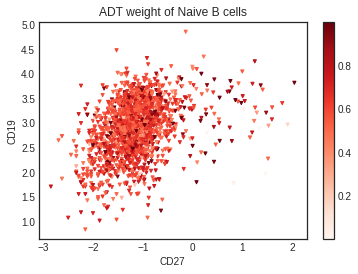

In [201]:
subdata = data_clr[metadata['celltype.l2']=='Memory B']
# df = pd.concat([subdata[subdata['CD3']>0],subdata[subdata['CD56']<1]])
# plt.scatter(subdata['CD27'],subdata['CD19'],s=10,c=metadata[metadata['celltype.l2']=='Memory B']['ADT.weight'],cmap='Reds')
plt.scatter(data_clr[metadata['celltype.l2']=='Naive B']['CD27'],data_clr[metadata['celltype.l2']=='Naive B']['CD19'],
            s=10,marker='v',c=metadata[metadata['celltype.l2']=='Naive B']['ADT.weight'],cmap='Reds')
plt.colorbar()
plt.xlabel('CD27')
plt.ylabel('CD19')
plt.title('ADT weight of Naive B cells')

In [133]:
set(metadata[metadata.index.isin(subdata.index)][subdata['CD3']>0].index)&set(metadata[metadata.index.isin(subdata.index)][subdata['CD56']<1].index)

{'a_AGCTCTCAGCCACGCT.1',
 'a_CTTGGCTCAGTGACAG.1',
 'a_GACGTTAAGGACATTA.1',
 'a_GTTACAGTCGGATGGA.1',
 'a_TTGACTTTCCCAAGAT.1',
 'b_CATTATCAGTAGATGT.1',
 'b_CGATGTAAGATCTGAA.1',
 'b_TGCGCAGCATACGCCG.1'}

In [127]:
metadata[metadata.index.isin(subdata.index)][subdata['CD56']<1]

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight,ADT.weight,wsnn_res.2,seurat_clusters
a_AGCTCTCAGCCACGCT.1,bmcite,3330,962,6931,25,HumanHTO8,batch1,NK,CD56 bright NK,0.452979,0.547021,10,10
a_CAAGAAACAGGGCATA.1,bmcite,1237,633,2029,25,HumanHTO8,batch1,NK,CD56 bright NK,0.101670,0.898330,22,22
a_CCTAGCTTCATTCACT.1,bmcite,1032,435,1885,24,HumanHTO4,batch1,NK,CD56 bright NK,0.331499,0.668501,30,30
a_CTACCCAGTCGAGTTT.1,bmcite,1074,481,1674,25,HumanHTO2,batch1,NK,CD56 bright NK,0.145543,0.854457,22,22
a_CTTGGCTCAGTGACAG.1,bmcite,2865,815,4064,25,HumanHTO3,batch1,NK,CD56 bright NK,0.109809,0.890191,22,22
a_GACGTTAAGGACATTA.1,bmcite,2969,822,3960,25,HumanHTO10,batch1,NK,CD56 bright NK,0.379375,0.620625,10,10
a_GCAATCAAGTGCGTGA.1,bmcite,2459,878,1855,25,HumanHTO5,batch1,NK,CD56 bright NK,0.126770,0.873230,22,22
a_GTTACAGTCGGATGGA.1,bmcite,2574,745,3567,25,HumanHTO4,batch1,NK,CD56 bright NK,0.098925,0.901075,22,22
a_TTGACTTTCCCAAGAT.1,bmcite,2759,844,4921,25,HumanHTO8,batch1,NK,CD56 bright NK,0.170696,0.829304,22,22
b_ACAGCTAAGTGAATTG.1,bmcite,1429,668,1973,24,HumanHTO5,batch2,NK,CD56 bright NK,0.395856,0.604144,22,22


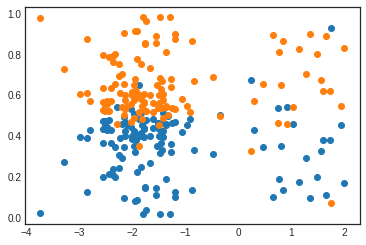

In [130]:
import matplotlib.pyplot as plt

plt.scatter(subdata['CD3'],metadata[metadata['celltype.l2']=='CD56 bright NK'].loc[:,'RNA.weight'])
plt.scatter(subdata['CD3'],metadata[metadata['celltype.l2']=='CD56 bright NK'].loc[:,'ADT.weight'])

In [69]:
mean_wrong_p = metadata[metadata['celltype.l2']=='Memory B'][subdata['CD27']<-0.5].loc[:,'ADT.weight'].mean()
mean_right_p = metadata[metadata['celltype.l2']=='Memory B'][subdata['CD27']>=-0.5].loc[:,'ADT.weight'].mean()

In [71]:
neighbor = pd.read_csv('./datasets/SeuratV3/wnn_neighbor.csv',sep=' ')

In [171]:
neighborNK = pd.read_csv('./datasets/SeuratV3/wnn_neighborNK.csv',sep=' ')
metadataNK = pd.read_csv('./datasets/SeuratV3/wnn_metadataNK.csv',sep=' ')
ndistNK = pd.read_csv('./datasets/SeuratV3/wnn_ndistNK.csv',sep=' ')

In [176]:
rpcaNK = pd.read_csv('./datasets/SeuratV3/wnn_rpcaNK.csv',sep=' ')
apcaNK = pd.read_csv('./datasets/SeuratV3/wnn_apcaNK.csv',sep=' ')

In [179]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(rpcaNK)
rneigh_dist, rneigh_ind = neigh.kneighbors(rpcaNK, n_neighbors=20, return_distance=True)
neigh.fit(apcaNK)
aneigh_dist, aneigh_ind = neigh.kneighbors(apcaNK, n_neighbors=20, return_distance=True)

In [39]:
import pandas as pd
rnn = pd.read_csv('./datasets/SeuratV3/allrnn_bNK.csv',' ')
ann = pd.read_csv('./datasets/SeuratV3/allpnn_bNK.csv',' ')
# rnn.iloc[30:33,50:54]

/home/xinzhu/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
rnn.iloc[:3,:3]

,a_AAACCTGTCTAACGGT.1,a_AAACGGGGTTCGGCAC.1,a_AAAGCAAAGACCTAGG.1
a_AAACCTGTCTAACGGT-1,1,0,0
a_AAACGGGGTTCGGCAC-1,0,1,0
a_AAAGCAAAGACCTAGG-1,0,0,1


In [218]:
subdataNK.index[0]

'a_AAACCTGTCTAACGGT.1'

In [38]:
(ann-rnn).sum().sum()

0

Text(0.5, 1.0, 'ADT weight of CD56 bright NK cells')

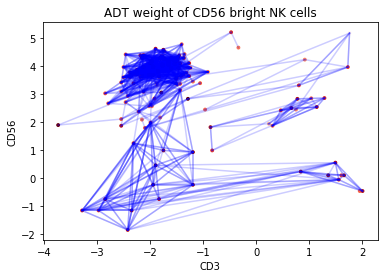

In [43]:
subdataNK = data_clr[metadata['celltype.l2']=='CD56 bright NK']
celldot = list(set(subdataNK.index) & set(ann.columns))
for i in celldot:
    for j in celldot:
        # if rnn.loc[i[:-2]+'-1',j] != 0 and ann.loc[i[:-2]+'-1',j] == 0:
        #     plt.plot([subdataNK.loc[i,'CD3'], subdataNK.loc[j,'CD3']],[subdataNK.loc[i,'CD56'], subdataNK.loc[j,'CD56']],c='g',alpha=0.2)
        if ann.loc[i[:-2]+'-1',j] != 0:# or rnn.loc[i[:-2]+'-1',j] != 0 :
            plt.plot([subdataNK.loc[i,'CD3'], subdataNK.loc[j,'CD3']],[subdataNK.loc[i,'CD56'], subdataNK.loc[j,'CD56']],c='b',alpha=0.2)

plt.scatter(subdataNK['CD3'],subdataNK['CD56'],s=8,c=metadata[metadata['celltype.l2']=='CD56 bright NK']['ADT.weight'],cmap='Reds')
# plt.colorbar()
plt.xlabel('CD3')
plt.ylabel('CD56')
plt.title('ADT weight of CD56 bright NK cells')


In [ ]:
cellranger count --id=CZWY --transcriptome=~/Desktop/HaiyangZhou/refdata-gex-GRCh38-2020-A --fastqs=~/Desktop/mount/HaiyangZhou/CZWY--sample=OES215810100B_01_raw_1

In [242]:
label_gating = pd.Series(index=subdataNK.index)
for i in subdataNK.index:
    if subdataNK.loc[i,'CD3']<0 and subdataNK.loc[i, 'CD56']>1:
        label_gating[i] = 1
    else:
        label_gating[i] = 0

/tmp/ipykernel_24121/2374488986.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  label_gating = pd.Series(index=subdataNK.index)


In [245]:
count = {'inner0a':0,'inner1a':0,'outa':0,'inner0r':0,'inner1r':0,'outr':0}
for i in subdataNK.index:
    for j in subdataNK.index:
        if ann.loc[i[:-2]+'-1',j] != 0:
            if label_gating[i] == label_gating[j] and label_gating[i]==0:
                count['inner0a'] += 1
            elif label_gating[i] == label_gating[j] and label_gating[i]==1:
                count['inner1a'] += 1
            else:
                count['outa'] += 1 
        if rnn.loc[i[:-2]+'-1',j] != 0:
            if label_gating[i] == label_gating[j] and label_gating[i]==0:
                count['inner0r'] += 1
            elif label_gating[i] == label_gating[j] and label_gating[i]==1:
                count['inner1r'] += 1
            else:
                count['outr'] += 1     

In [246]:
label_gating.value_counts()

1.0    92
0.0    33
dtype: int64

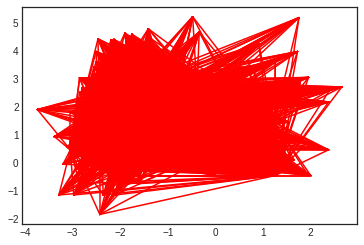

In [175]:
subdataNK = data_clr[metadata['celltype.l1']=='NK']
subdataNK.index = [x[:-2]+'-1' for x in subdataNK.index]
for i in range(len(neighborNK)):
    ind1 = metadataNK.index[i]
    if ind1 not in subdataNK.index:
        continue
    for j in range(neighborNK.shape[1]):
        ind2 = metadataNK.index[j]
        if ind2 not in subdataNK.index:
            continue
        plt.plot([subdataNK.loc[ind1,'CD3'],subdataNK.loc[ind2,'CD3']],
                 [subdataNK.loc[ind1,'CD56'],subdataNK.loc[ind2,'CD56']],
                 c='r')


In [152]:
cell_false = metadata[metadata['celltype.l2']=='Memory B'][subdata['CD27']<-0.5]
neighbor_false = neighbor.iloc[[i for i in range(len(neighbor)) if raw_index[i][:-2]+'.1' in cell_false.index],:]
neighbor_false_list = np.array(neighbor_false).flatten()
neighbor_false_list = list(set(neighbor_false_list))
neighbor_fdata = data_clr.loc[[raw_index[i][:-2]+'.1' for i in neighbor_false_list if raw_index[i][:-2]+'.1' in data_clr.index],'CD27']
plt.hist(neighbor_fdata,bins=500)
plt.show()
dataf_label = metadata_raw[metadata_raw.index.isin(neighbor_fdata.index)]
countF = sum(neighbor_fdata[dataf_label['celltype.l1']=='B cell']>0)/len(neighbor_fdata[dataf_label['celltype.l1']=='B cell'])
dataf_label['celltype.l2'].value_counts()

/tmp/ipykernel_24121/10223817.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cell_false = metadata[metadata['celltype.l2']=='Memory B'][subdata['CD27']<-0.5]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

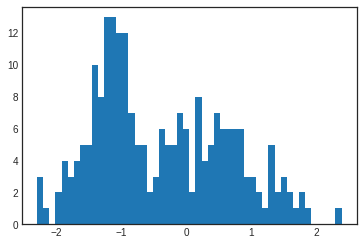

In [98]:
plt.hist(neighbor_fdata[dataf_label['celltype.l1']=='B cell'],bins=50)
plt.show()
countF[1] = sum(neighbor_fdata[dataf_label['celltype.l1']=='B cell']<-0.5)/len(neighbor_fdata[dataf_label['celltype.l1']=='B cell'])

In [96]:
countF[1] = countF[1]/len(neighbor_fdata)

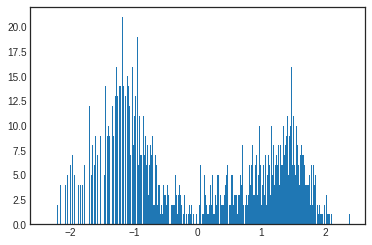

CD14 Mono         372
CD4 Naive         273
CD8 Naive         241
CD4 Memory        195
Naive B           112
Memory B          101
NK                 83
GMP                53
Prog_RBC           46
CD8 Effector_1     39
CD8 Memory_1       35
CD8 Memory_2       33
MAIT               29
gdT                25
HSC                22
cDC2               21
CD16 Mono          20
pDC                20
Treg               19
LMPP               18
Plasmablast        17
Prog_DC            14
CD8 Effector_2     14
Prog_B 2           11
Prog_B 1           10
CD56 bright NK      6
Prog_Mk             4
Name: celltype.l2, dtype: int64

In [154]:
cell_true = metadata[metadata['wsnn_res.2']==6][subdata['CD27']>0]
neighbor_true = neighbor.iloc[[i for i in range(len(neighbor)) if raw_index[i][:-2]+'.1' in cell_true.index],:]
neighbor_true_list = np.array(neighbor_true).flatten()
neighbor_true_list = list(set(neighbor_true_list))
neighbor_tdata = data_clr.loc[[raw_index[i][:-2]+'.1' for i in neighbor_true_list if raw_index[i][:-2]+'.1' in data_clr.index],'CD27']
plt.hist(neighbor_tdata,bins=500)
plt.show()
datat_label = metadata_raw[metadata_raw.index.isin(neighbor_tdata.index)]
countT = sum(neighbor_tdata[datat_label['celltype.l1']=='B cell']>0)/len(neighbor_tdata[datat_label['celltype.l1']=='B cell'])
datat_label['celltype.l2'].value_counts()

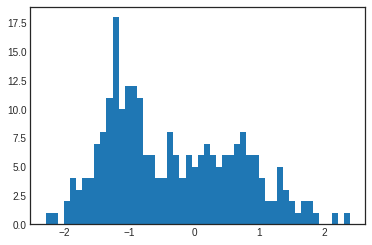

In [101]:
plt.hist(neighbor_tdata[datat_label['celltype.l1']=='B cell'],bins=50)
plt.show()
countT = [countT,sum(neighbor_tdata[datat_label['celltype.l1']=='B cell']<-0.5)/len(neighbor_tdata[datat_label['celltype.l1']=='B cell'])]

In [140]:
metadataB = pd.read_csv('./datasets/SeuratV3/wnn_metadataB.csv',sep=' ')
metadataB.index = [x[:-2]+'.1' for x in metadataB.index]
metadataB = metadataB[metadataB.index.isin(data_B.index)]

In [144]:
dataB_clr = np.apply_along_axis(lambda x: np.log(x+1) - np.mean(np.log(x+1)),0,data_B)
dataB_clr = pd.DataFrame(dataB_clr,index=data_B.index,columns = data_B.columns)
subdata_bm = dataB_clr[metadataB['wsnn_res.0.1']==1]
# display_subdata(dataB_clr,subdata_bm)

In [148]:
# len(set(data_clr[metadata['wsnn_res.2']==6].index)&set(dataB_clr[metadataB['wsnn_res.0.1']==1].index))
len(set(data_clr[metadata['celltype.l2']=='Memory B'].index)&set(data_clr[metadata['wsnn_res.2']==6].index))

1601

/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/xinzhu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

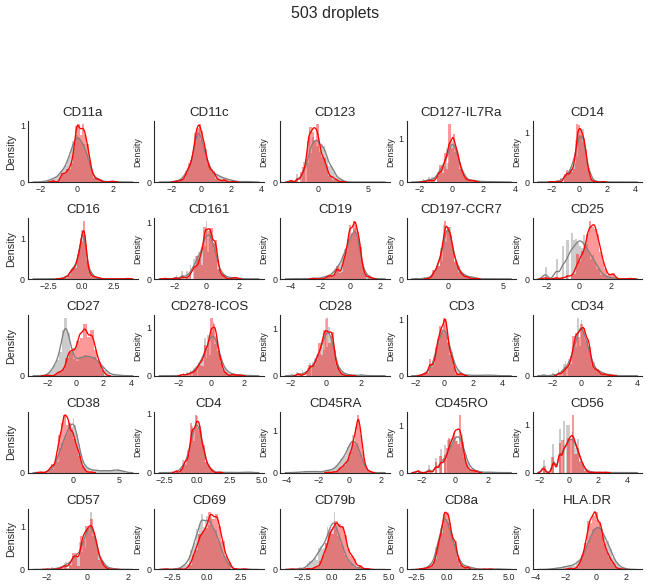

In [151]:
display_subdata(dataB_clr,dataB_clr[metadataB['wsnn_res.2']==1])

In [56]:
def df_construct(umi_count, columns='B_info', name='all'):
    ct = ['B']
    df = pd.DataFrame()
    for i in range(len(ct)):
        temp = pd.DataFrame(data=list(np.log2(umi_count['rna_umi'])),columns=['count'])
        print(len(umi_count['rna_umi']))
        temp['celltype'] = pd.Series(ct[i],index=temp.index)
        df = pd.concat([df,temp],ignore_index=True)
    df['sample'] = pd.Series(name,index=df.index)
    return df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
# tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="sample", y="count",
            hue="celltype",
            data=df)
sns.despine(offset=10, trim=True)
plt.savefig('./data/dilution_PBMC_Jurkat/fig/B_umi.pdf')